# Evaluation Practice - bacth no -DS2309

# Insurance Claim Fraud Detection

In [1138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [1139]:
#Loading Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [1140]:
df.shape

(1000, 40)

In [1141]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [1142]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [1143]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [1144]:
df.nunique().to_frame("No of unique Values")

,No of unique Values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [1145]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [1146]:
#found ? in the colmns collision_type,property_damage and police_report_available so we have to replace ? by null valus

In [1147]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [1148]:
df=df.replace('?',np.NaN)

In [1149]:
df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [1150]:
# Let check if any whitespace, 'NA' or '-' exist in dataset.

In [1151]:
df.isin([' ','NA','-']).sum().any()

False

In [1152]:
# No whitespace, NA, '-' exist in dataset.

<Axes: >

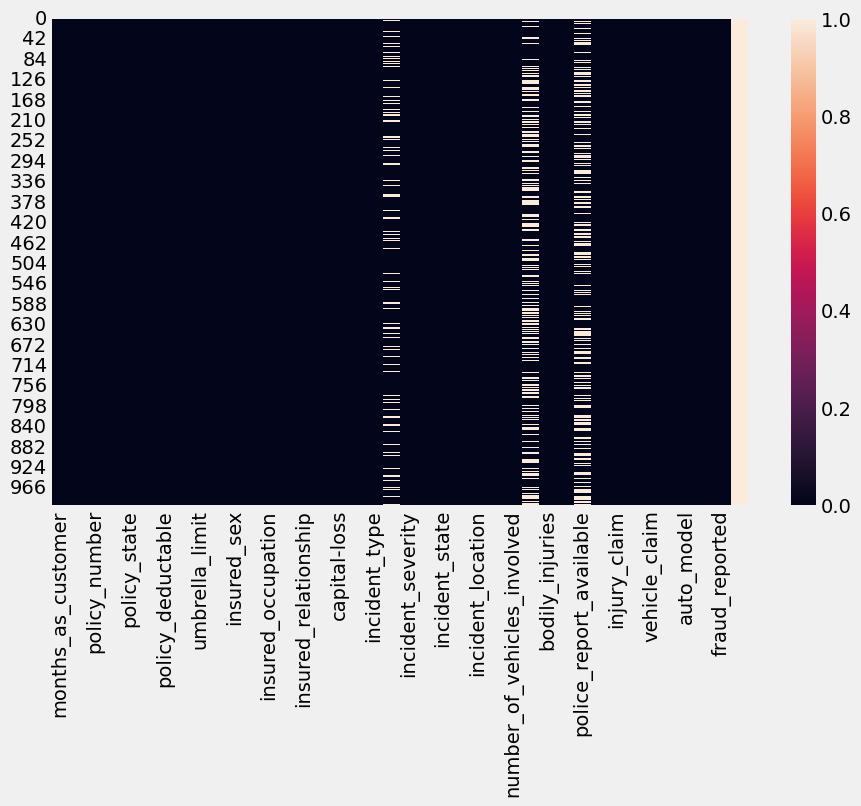

In [1153]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [1154]:
# There are missing values in collision_type,property_damage and police_report_availables

In [1155]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))


                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
authorities_contacted                     0             0.0
total_claim_amount                        0             0.0
injury_claim                            

In [1156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [1157]:
#there are 1000 colmns and 40 columns in the dataset
#there are 19 numeric nature columns and 21 non numerical nature columns present in the dataset
# fraud_reported is the target variable having Yes nor No nature . it is a catagorical nature
#There are three types of datatype dtypes: float64(2), int64(17), object(21)

In [1158]:
df['policy_bind_date']=pd.to_datetime(df.policy_bind_date,format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [1159]:
df['Policy_Day']=df['policy_bind_date'].apply(lambda x:x.day)
df['Policy_Month']=df['policy_bind_date'].apply(lambda x:x.month)
df['Policy_Year']=df['policy_bind_date'].apply(lambda x:x.year)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Policy_Day,Policy_Month,Policy_Year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,NaN,17,10,2014
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,NaN,27,6,2006
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,NaN,6,9,2000
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,25,5,1990
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,NaN,6,6,2014


In [1160]:
df['incident_date']=pd.to_datetime(df.incident_date,format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [1161]:
df['incident_day']=df['incident_date'].apply(lambda x:x.day)
df['incident__Month']=df['incident_date'].apply(lambda x:x.month)
df['incident_Year']=df['incident_date'].apply(lambda x:x.year)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_model,auto_year,fraud_reported,_c39,Policy_Day,Policy_Month,Policy_Year,incident_day,incident__Month,incident_Year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,92x,2004,Y,NaN,17,10,2014,25,1,2015
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,E400,2007,Y,NaN,27,6,2006,21,1,2015
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,RAM,2007,N,NaN,6,9,2000,22,2,2015
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Tahoe,2014,Y,NaN,25,5,1990,10,1,2015
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,RSX,2009,N,NaN,6,6,2014,17,2,2015


In [1162]:
# Imputating Missing value with mode for categorical features
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True) 

In [1163]:
#Droping unnecessary columns
df.drop(["_c39"], axis=1, inplace=True)
df.drop(["incident_date"], axis=1, inplace=True)
df.drop(["policy_bind_date"], axis=1, inplace=True)


In [1164]:
#Missing Value Check After Imputation
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
months_as_customer                        0             0.0
vehicle_claim                             0             0.0
number_of_vehicles_involved               0             0.0
property_damage                           0             0.0
bodily_injuries                           0             0.0
witnesses                                 0             0.0
police_report_available                   0             0.0
total_claim_amount                        0             0.0
injury_claim                              0             0.0
property_claim                            0             0.0
auto_make                                 0             0.0
incident_location                         0             0.0
auto_model                                0             0.0
auto_year                                 0             0.0
fraud_reported                            0             0.0
Policy_Day                              

<Axes: >

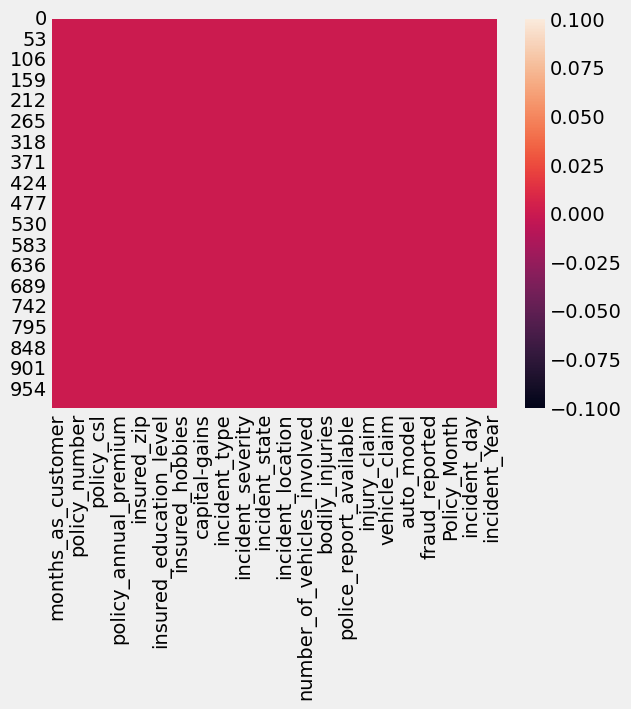

In [1165]:
sns.heatmap(df.isnull())

In [1166]:
#we have solved all missing value or null vles in the data set

In [1167]:
#seperating numerical data and catagorical data
catagorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        catagorical_col.append(i)
print("catagorical columns",catagorical_col)
print("\n")

catagorical columns ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']




In [1168]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns",numerical_col)
print("\n")

Numerical columns ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'Policy_Day', 'Policy_Month', 'Policy_Year', 'incident_day', 'incident__Month', 'incident_Year']




In [1169]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,injury_claim,property_claim,vehicle_claim,auto_year,Policy_Day,Policy_Month,Policy_Year,incident_day,incident__Month,incident_Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,7433.420000,7399.570000,37928.950000,2005.103000,15.448000,6.559000,2001.604000,14.995000,1.496000,2015.0
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,4880.951853,4824.726179,18886.252893,6.015861,8.808001,3.499824,7.360391,8.670995,0.523697,0.0
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,4295.000000,4445.000000,30292.500000,2000.000000,8.000000,3.000000,1995.000000,7.750000,1.000000,2015.0
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,6775.000000,6750.000000,42100.000000,2005.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,2015.0
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,11305.000000,10885.000000,50822.500000,2010.000000,23.000000,10.000000,2008.000000,22.000000,2.000000,2015.0
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,2015.0


In [1170]:
#Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes.

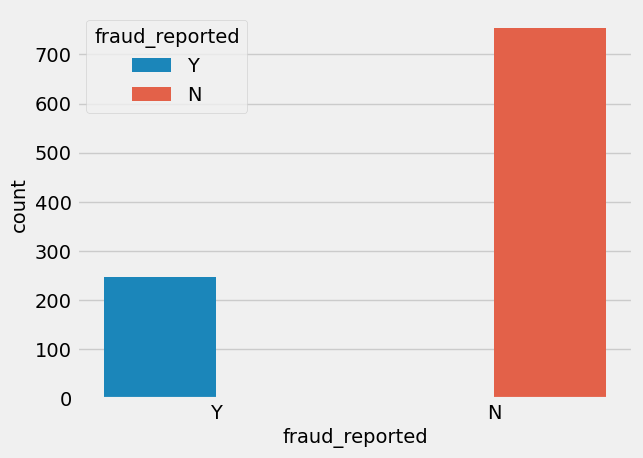

In [1171]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [1172]:
df['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

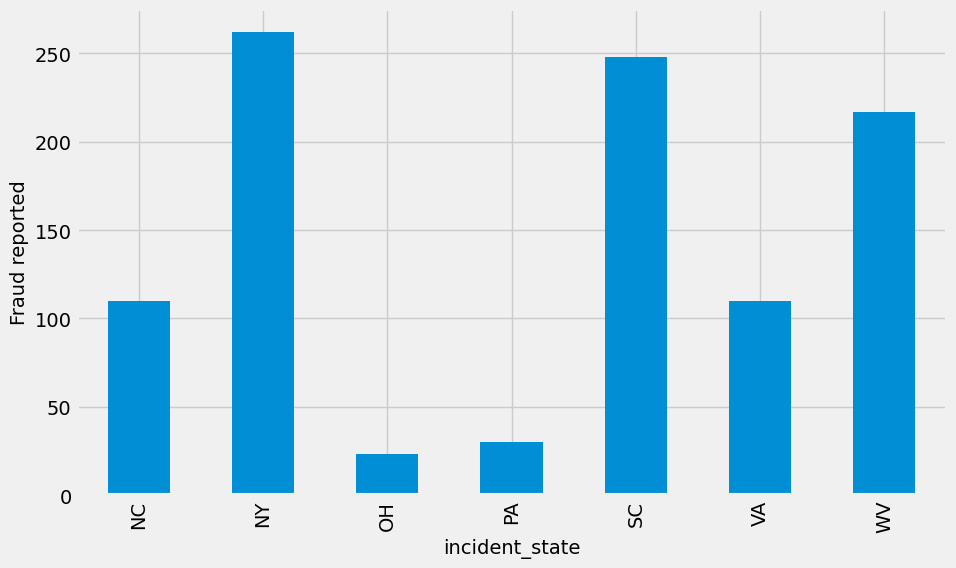

In [1173]:
#inicdent_state vs Fraud reported
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

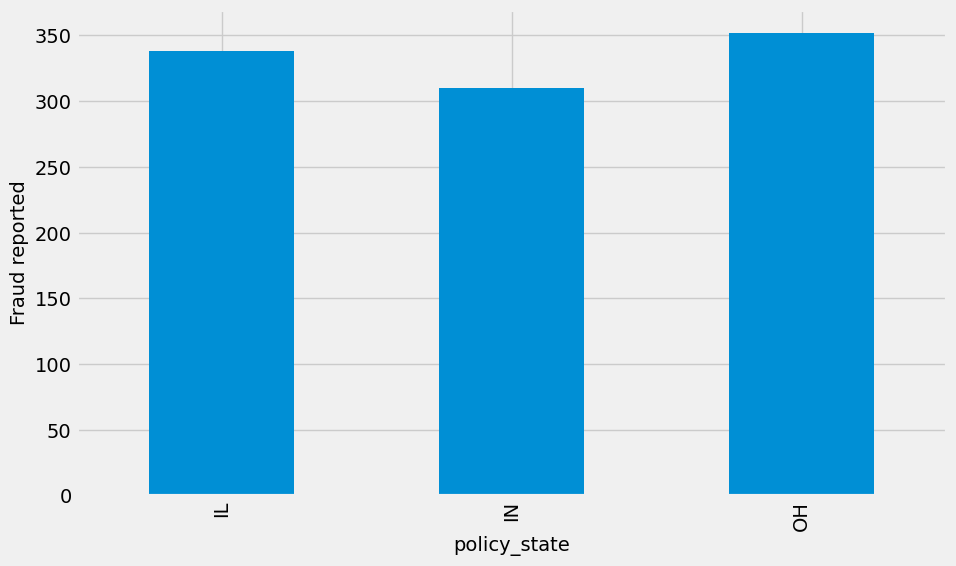

In [1174]:
#policy_state vs fraud reported
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

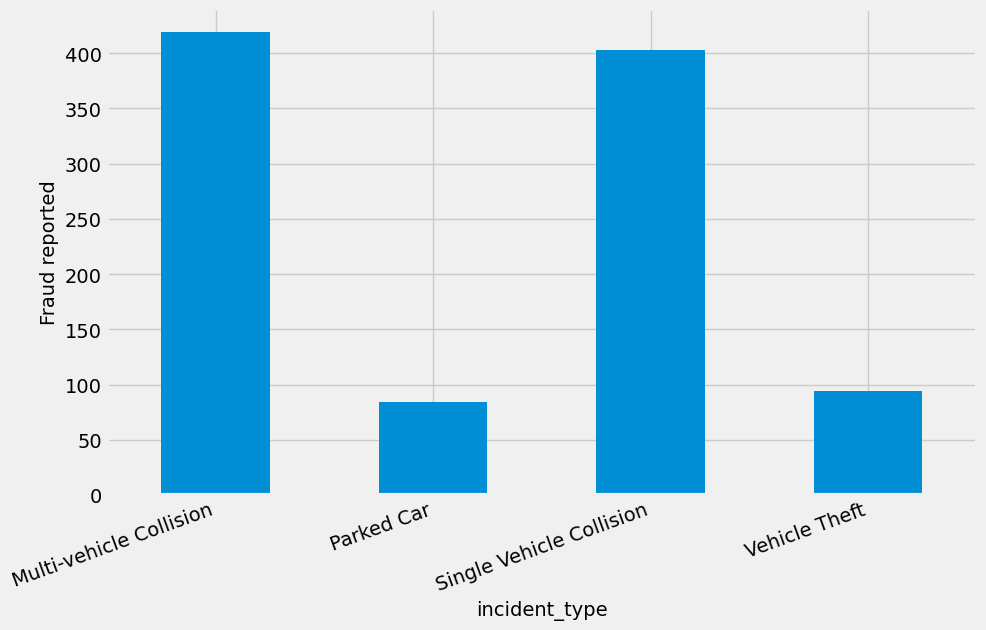

In [1175]:
#incicent_type vs fraud reported
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

In [1176]:
#most of thr fraud reported in the cagtagory multi-vecicle collision and single vehicle collision

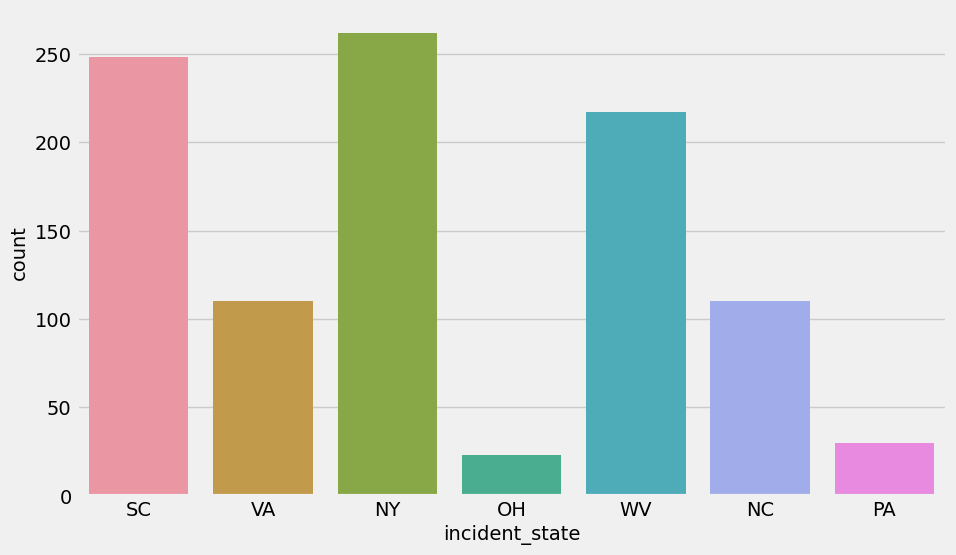

In [1177]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

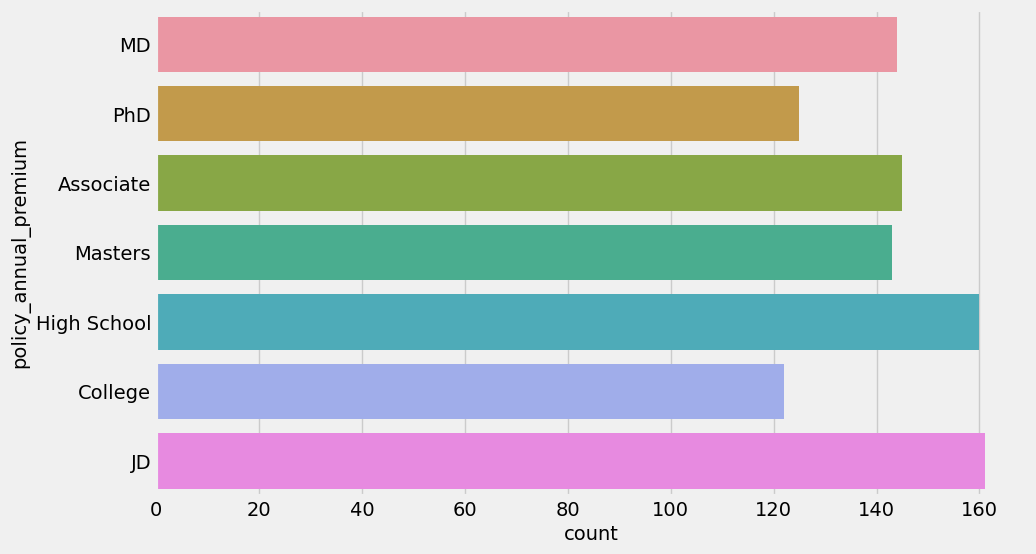

In [1178]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

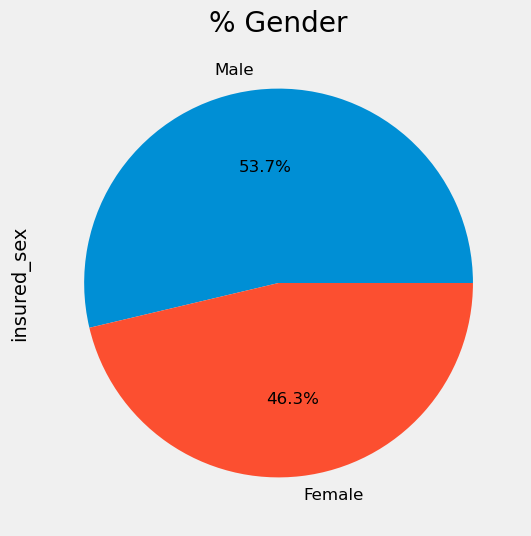

In [1179]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

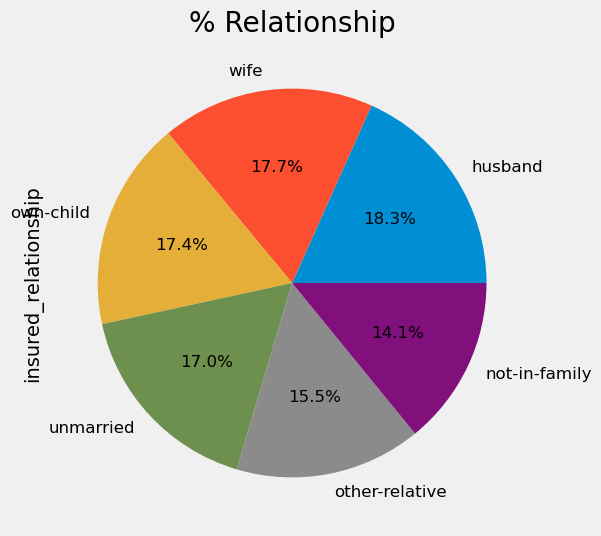

In [1180]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

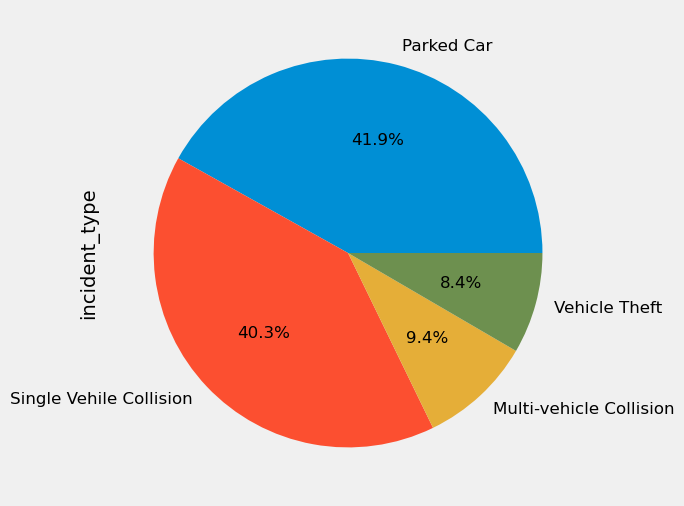

In [1181]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

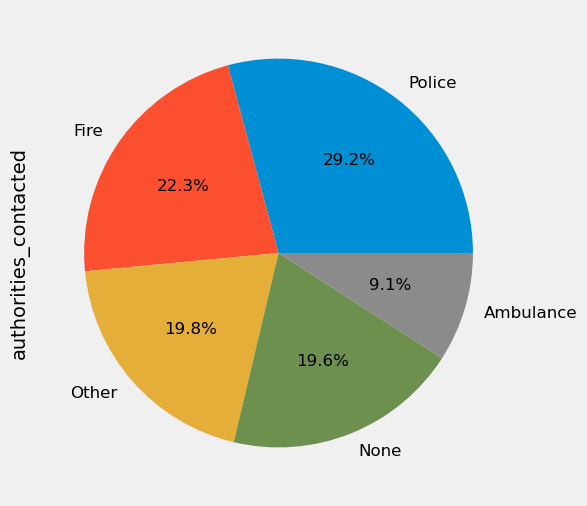

In [1182]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

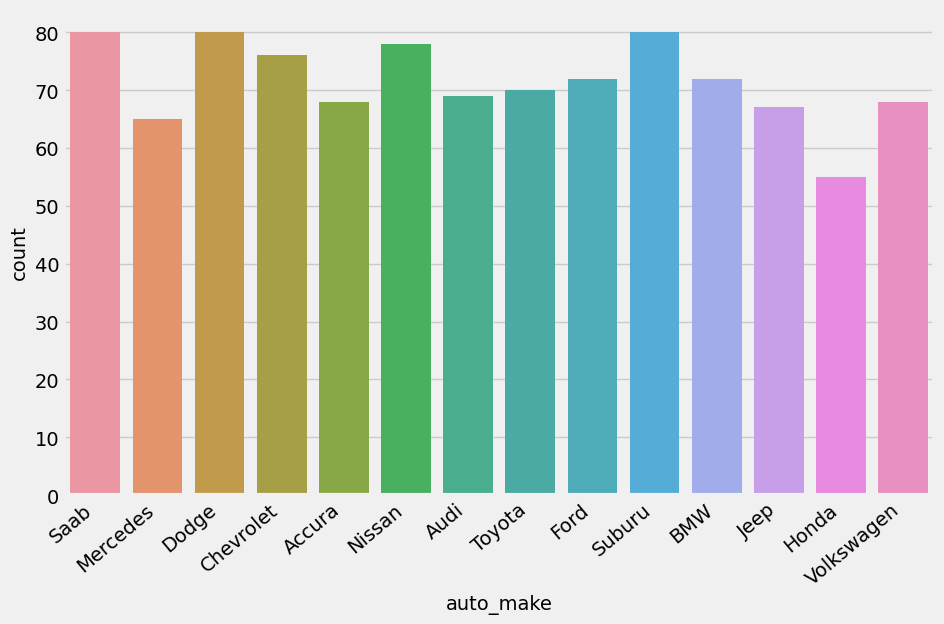

In [1183]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

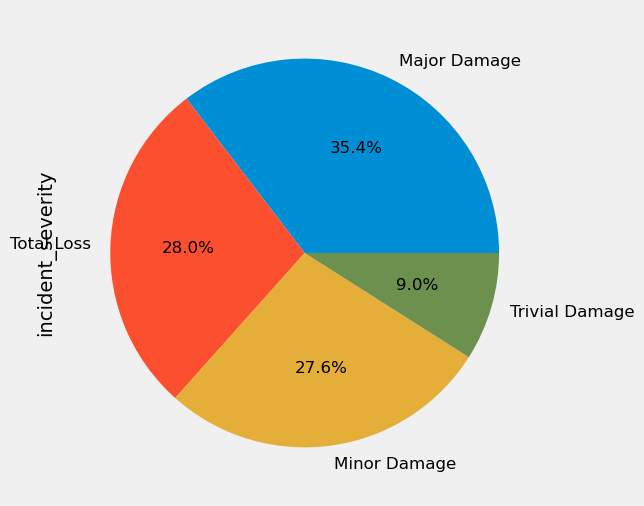

In [1184]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  

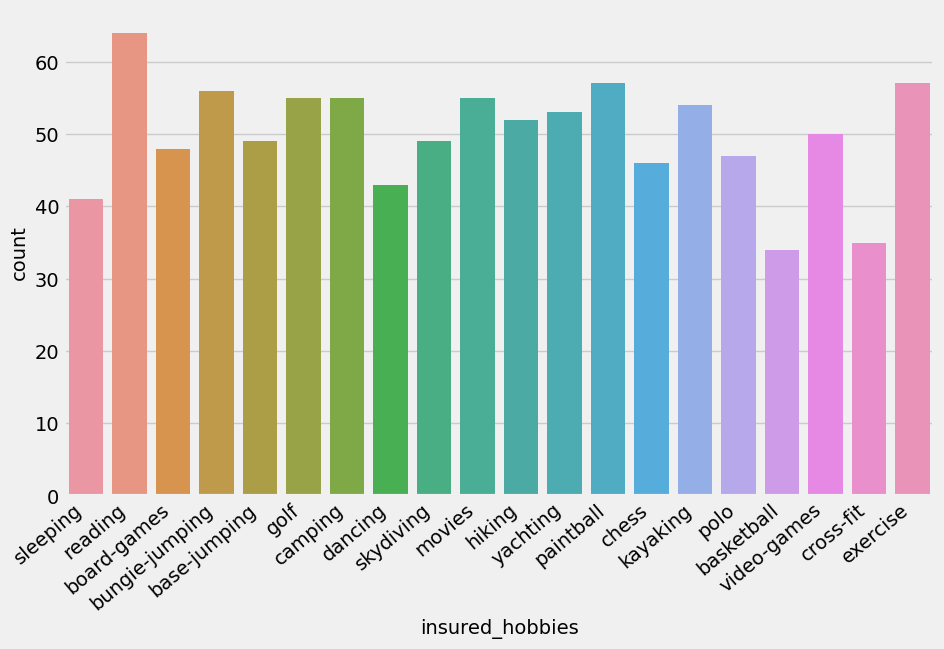

In [1185]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

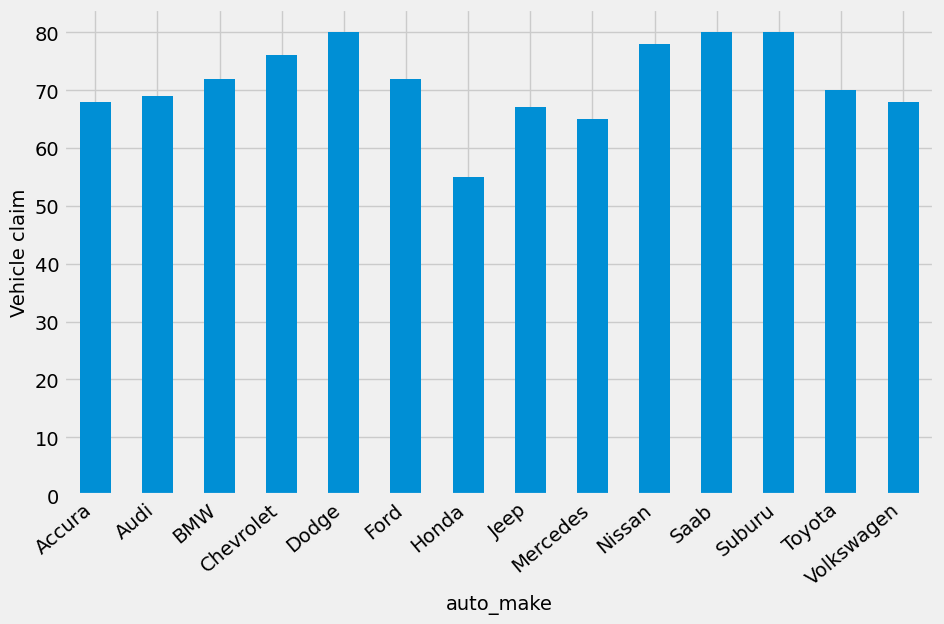

In [1186]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [1187]:
#Cleaning up the data and prepare it for machine learning model.
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,incident_day,incident__Month,incident_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,1,17,10,2014,25,1,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,1,27,6,2006,21,1,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,0,6,9,2000,22,2,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,1,25,5,1990,10,1,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,0,6,6,2014,17,2,2015


In [1188]:
df.auto_year.value_counts()  # check the spread of years to decide on further action.

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [1189]:
df['vehicle_age'] = 2018 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [1190]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [1191]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,incident_day,incident__Month,incident_Year,vehicle_age,incident_period_of_day
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2004,1,17,10,2014,25,1,2015,14,early_morning
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,2007,1,27,6,2006,21,1,2015,11,morning
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2007,0,6,9,2000,22,2,2015,11,morning
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2014,1,25,5,1990,10,1,2015,4,early_morning
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,2009,0,6,6,2014,17,2,2015,9,evening


In [1192]:
#Feature selection and Engineering

In [1193]:
# 1. Skewness of Features
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
Policy_Day                     0.053237
Policy_Month                  -0.016994
Policy_Year                    0.052511
incident_day                   0.039711
incident__Month                0.267378
incident_Year                  0.000000


In [1194]:
#umbrella_limit,insured_zip,vehicle_claim are having skewness and they are numerical nature
#We will yeo-johnson transformation method.
# Removing skewness using yeo-johnson  method to get better prediction

In [1195]:
skew = ['umbrella_limit', 'insured_zip', 'vehicle_claim']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,umbrella_limit,insured_zip,vehicle_claim
0,-0.349113,-5.551115e-16,0.753697
1,1.357817,-4.996004e-16,-1.786629
2,1.357817,-1.720846e-15,-0.820881
3,1.644005,2.164935e-15,0.677602
4,1.644005,2.164935e-15,-1.740038


In [1196]:
#checking skewness after sorting it 
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                -7.865930
insured_zip                    0.000000
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.522718
auto_year                     -0.048289
fraud_reported                 1.175051
Policy_Day                     0.053237
Policy_Month                  -0.016994
Policy_Year                    0.052511
incident_day                   0.039711
incident__Month                0.267378
incident_Year                  0.000000


In [1197]:
#we have solved skewness for all columns 

In [1198]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                 float64
insured_zip                    float64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [1199]:
#Encoding categorical data
# Using Label Encoder on categorical variable
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,incident_day,incident__Month,incident_Year,vehicle_age,incident_period_of_day
0,328,48,521585,2.0,1.0,1000,1406.91,-0.349113,-5.551115e-16,1.0,...,2004,1,17,10,2014,25,1,2015,14,1.0
1,228,42,342868,1.0,1.0,2000,1197.22,1.357817,-4.996004e-16,1.0,...,2007,1,27,6,2006,21,1,2015,11,4.0
2,134,29,687698,2.0,0.0,2000,1413.14,1.357817,-1.720846e-15,0.0,...,2007,0,6,9,2000,22,2,2015,11,4.0
3,256,41,227811,0.0,1.0,2000,1415.74,1.644005,2.164935e-15,0.0,...,2014,1,25,5,1990,10,1,2015,4,1.0
4,228,44,367455,0.0,2.0,1000,1583.91,1.644005,2.164935e-15,1.0,...,2009,0,6,6,2014,17,2,2015,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2.0,2.0,1000,1310.80,-0.349113,-1.720846e-15,0.0,...,2006,0,16,7,1991,22,2,2015,12,2.0
996,285,41,186934,0.0,0.0,1000,1436.79,-0.349113,2.164935e-15,0.0,...,2015,0,5,1,2014,24,1,2015,3,5.0
997,130,34,918516,2.0,1.0,500,1383.49,0.756509,-1.276756e-15,0.0,...,1996,0,17,2,2003,23,1,2015,22,1.0
998,458,62,533940,0.0,2.0,2000,1356.92,1.357817,-1.276756e-15,1.0,...,1998,0,18,11,2011,26,2,2015,20,6.0


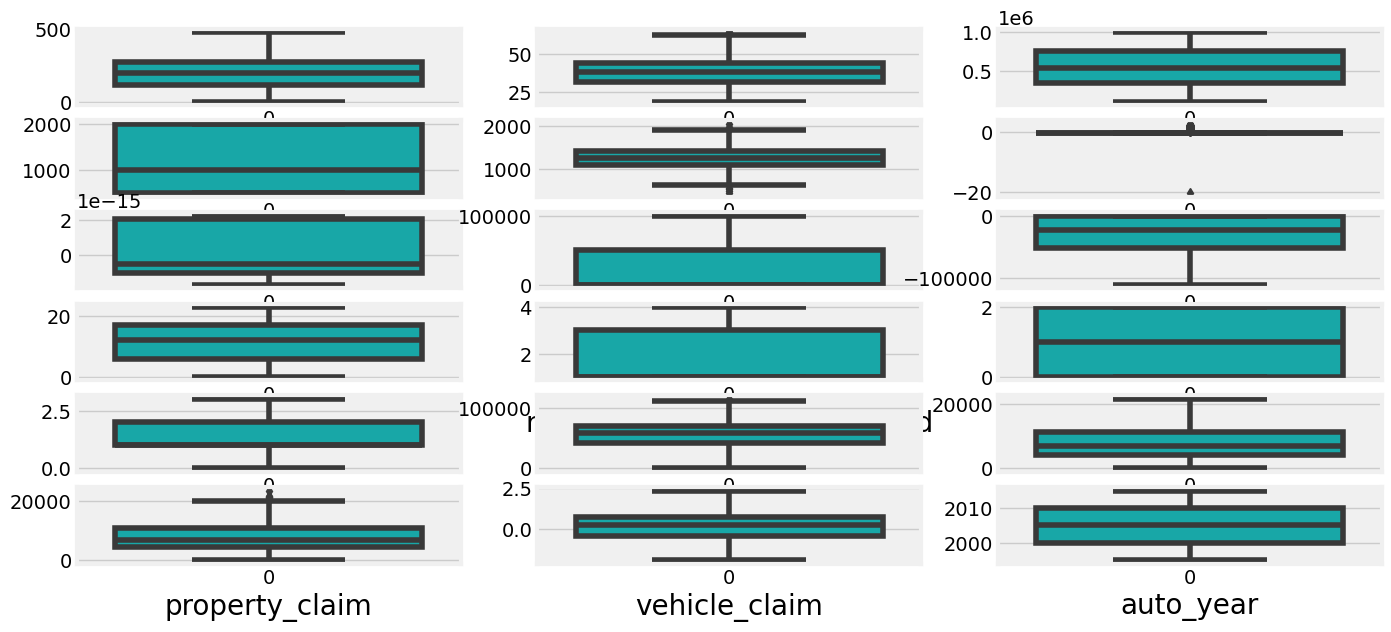

In [1209]:
#2.Outliers Detection and Removal
#cheking for outliers
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [1210]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_year,fraud_reported,Policy_Day,Policy_Month,Policy_Year,incident_day,incident__Month,incident_Year,vehicle_age,incident_period_of_day
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,5.329071e-17,1.160183e-17,0.463000,...,2005.103000,0.247000,15.448000,6.559000,2001.604000,14.995000,1.496000,2015.0,12.897000,2.822000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,1.000500e+00,1.440181e-15,0.498879,...,6.015861,0.431483,8.808001,3.499824,7.360391,8.670995,0.523697,0.0,6.015861,2.187945
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-2.052549e+01,-1.776357e-15,0.000000,...,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0,3.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,-3.491129e-01,-1.054712e-15,0.000000,...,2000.000000,0.000000,8.000000,3.000000,1995.000000,7.750000,1.000000,2015.0,8.000000,1.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,-3.491129e-01,-5.551115e-16,0.000000,...,2005.000000,0.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,2015.0,13.000000,3.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,-3.491129e-01,2.053913e-15,1.000000,...,2010.000000,0.000000,23.000000,10.000000,2008.000000,22.000000,2.000000,2015.0,18.000000,5.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,2.727988e+00,2.275957e-15,1.000000,...,2015.000000,1.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,2015.0,23.000000,6.000000


In [1212]:
#Droping unnecessary columns
df.drop(["policy_number"], axis=1, inplace=True)
df.drop(['insured_zip'], axis=1, inplace=True)
df.drop(["incident_location"], axis=1, inplace=True)
df.drop(['auto_year'], axis=1, inplace=True)
df.drop(['incident_hour_of_the_day'], axis=1, inplace=True)
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_model,fraud_reported,Policy_Day,Policy_Month,Policy_Year,incident_day,incident__Month,incident_Year,vehicle_age,incident_period_of_day
0,328,48,2.0,1.0,1000,1406.91,-0.349113,1.0,4.0,2.0,...,1.0,1,17,10,2014,25,1,2015,14,1.0
1,228,42,1.0,1.0,2000,1197.22,1.357817,1.0,4.0,6.0,...,12.0,1,27,6,2006,21,1,2015,11,4.0
2,134,29,2.0,0.0,2000,1413.14,1.357817,0.0,6.0,11.0,...,30.0,0,6,9,2000,22,2,2015,11,4.0
3,256,41,0.0,1.0,2000,1415.74,1.644005,0.0,6.0,1.0,...,34.0,1,25,5,1990,10,1,2015,4,1.0
4,228,44,0.0,2.0,1000,1583.91,1.644005,1.0,0.0,11.0,...,31.0,0,6,6,2014,17,2,2015,9,2.0


In [1213]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_model,fraud_reported,Policy_Day,Policy_Month,Policy_Year,incident_day,incident__Month,incident_Year,vehicle_age,incident_period_of_day
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,-0.003277,0.060925,-0.000833,0.009814,...,0.004202,0.020544,0.054809,-0.001559,-0.048276,-0.001455,-0.042826,NaN,0.000292,-0.050762
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.005086,0.073337,0.000969,0.017220,...,0.017343,0.012143,0.056776,0.008357,-0.037444,0.003697,-0.037058,NaN,-0.001354,-0.022988
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.044939,-0.020481,-0.034327,-0.031215,...,-0.025253,0.029432,0.011178,0.046871,-0.007276,0.025572,0.018531,NaN,-0.002114,-0.034415
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.039304,-0.010757,0.009153,0.015788,...,0.047885,-0.037190,0.010164,-0.021547,-0.016466,-0.007640,-0.030164,NaN,0.033082,0.002433
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.027891,-0.009733,0.015217,-0.046733,...,-0.003268,0.014817,-0.000265,-0.025020,-0.049598,-0.022701,-0.026416,NaN,-0.026105,0.013988
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.011073,0.038853,-0.019715,0.035922,...,-0.031849,-0.014480,-0.037933,-0.002480,0.001249,0.028797,-0.046097,NaN,0.049226,-0.002951
umbrella_limit,-0.003277,0.005086,-0.044939,0.039304,0.027891,-0.011073,1.000000,-0.012645,0.015542,0.020480,...,0.019138,0.056130,0.008056,-0.025973,0.055605,-0.041800,0.017047,NaN,-0.037638,0.032487
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,-0.012645,1.000000,0.009002,-0.006160,...,-0.018421,0.030873,0.039769,-0.001042,-0.032891,0.001924,-0.025471,NaN,0.028247,-0.039054
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,0.015542,0.009002,1.000000,-0.020298,...,0.049445,0.008808,0.042708,-0.082494,0.018952,-0.038402,-0.053106,NaN,-0.043509,0.023937
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.020480,-0.006160,-0.020298,1.000000,...,0.020584,0.001564,0.007930,-0.010890,-0.027085,-0.018720,-0.009459,NaN,0.006676,0.052618


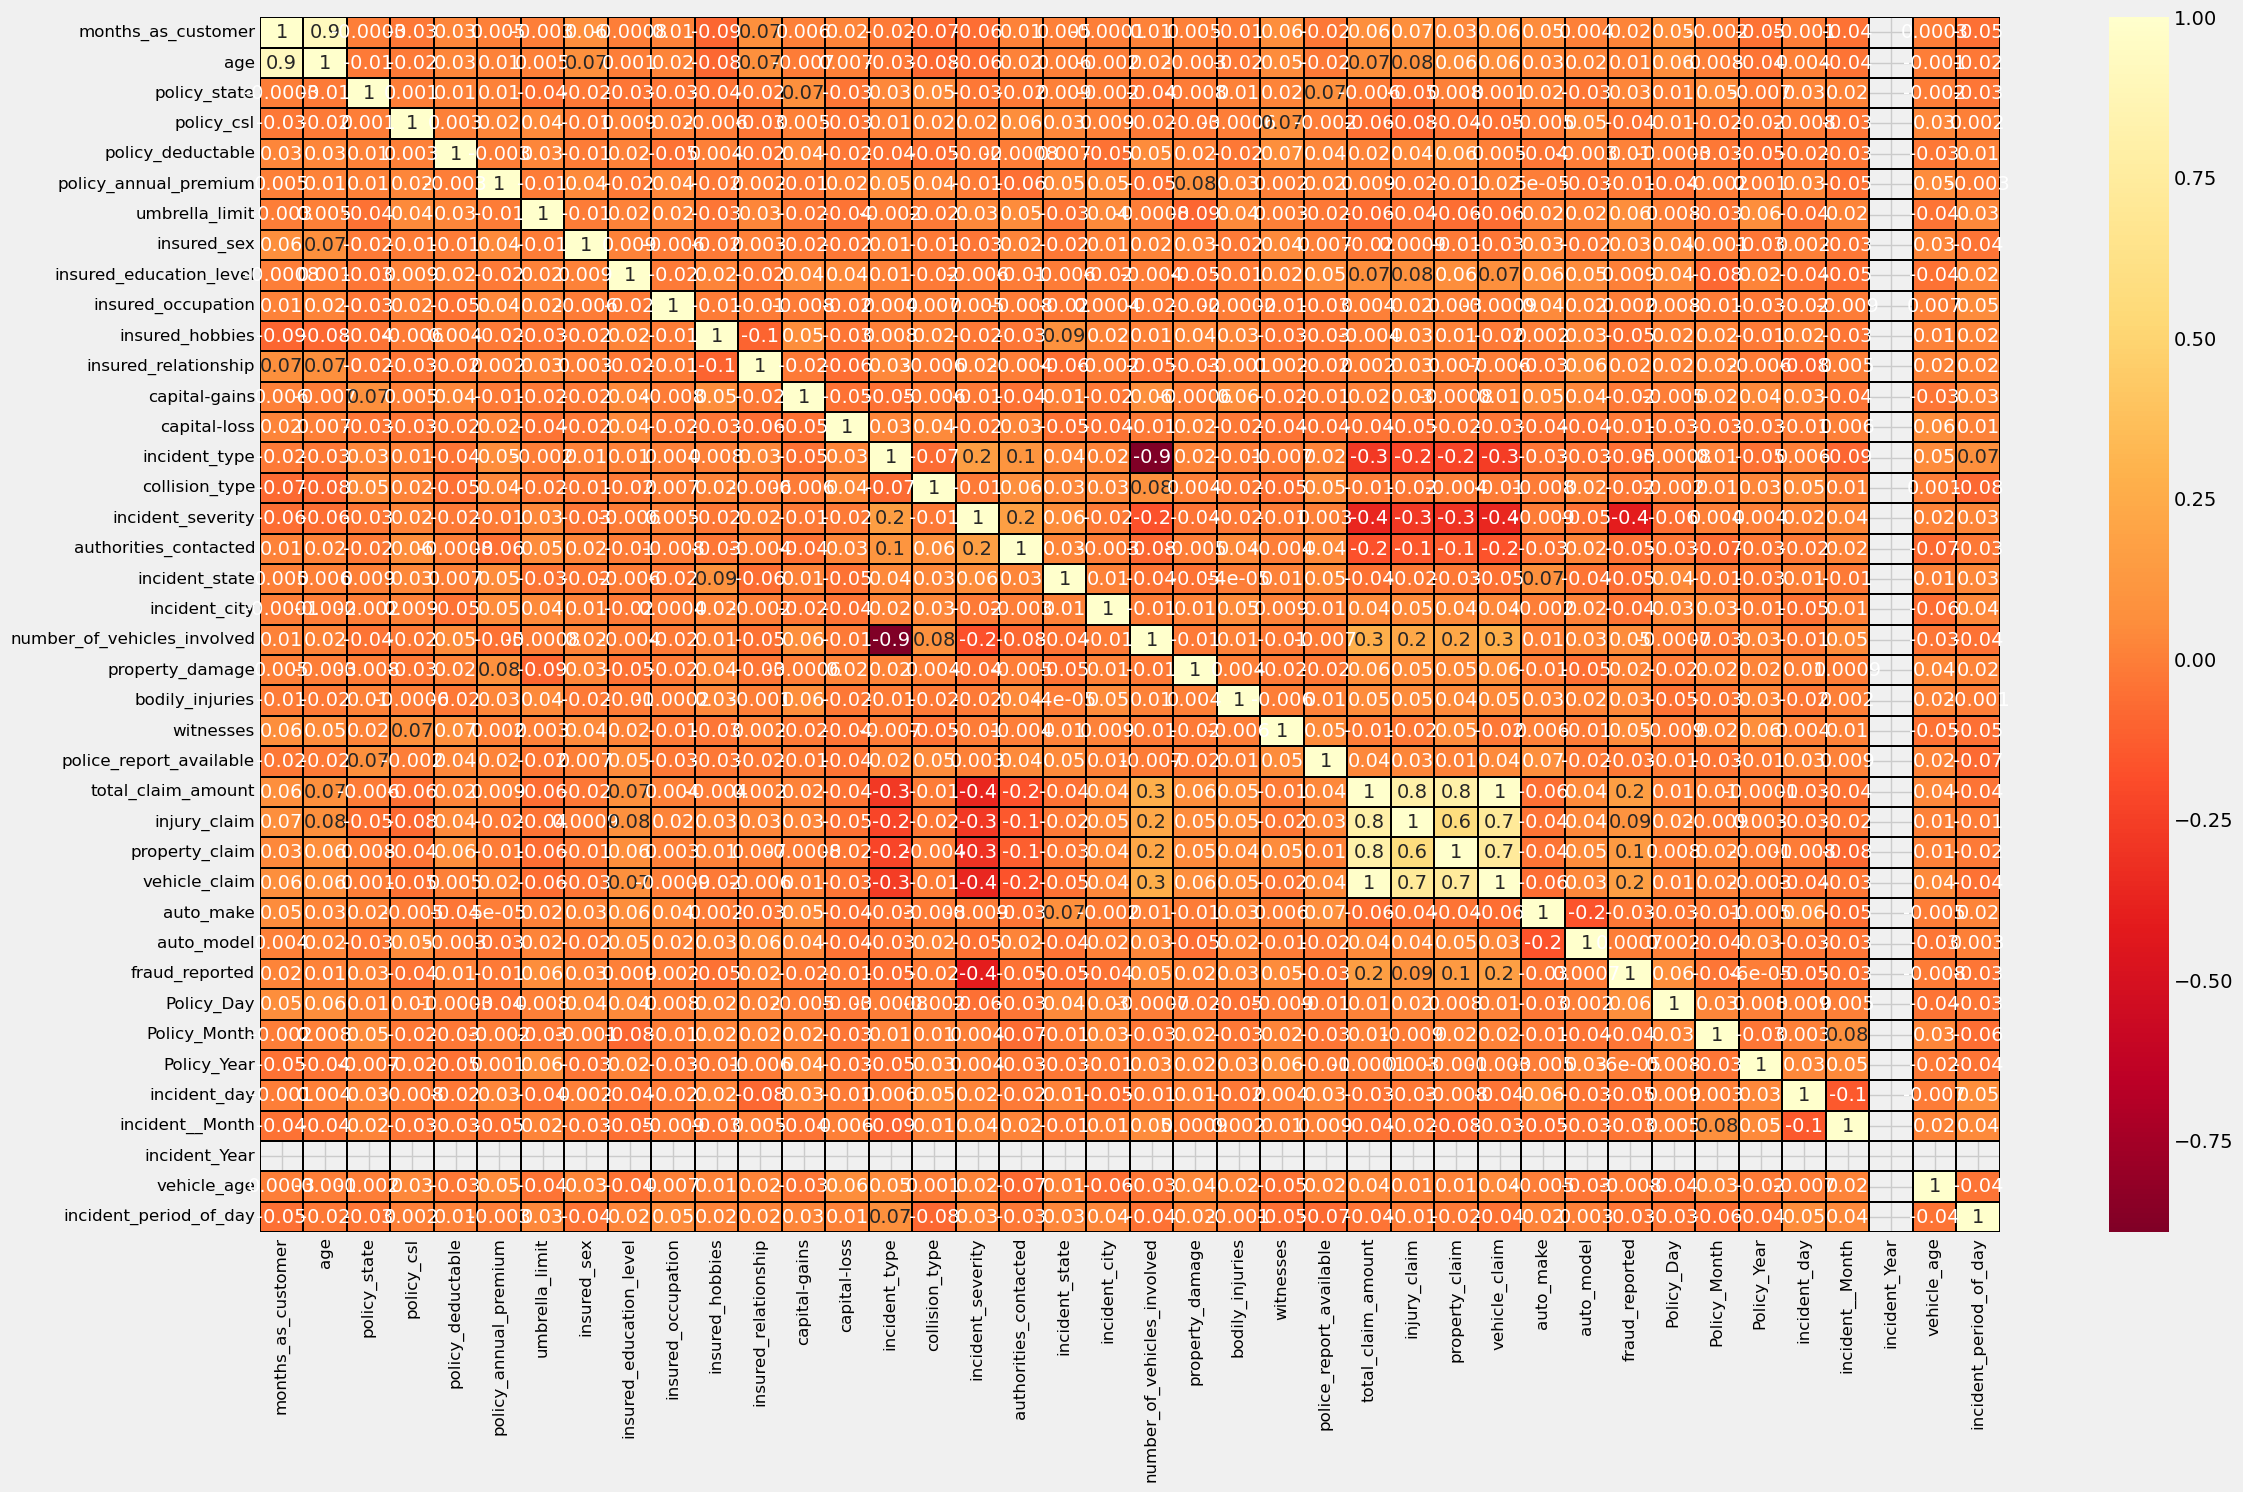

In [1214]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="YlOrRd_r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

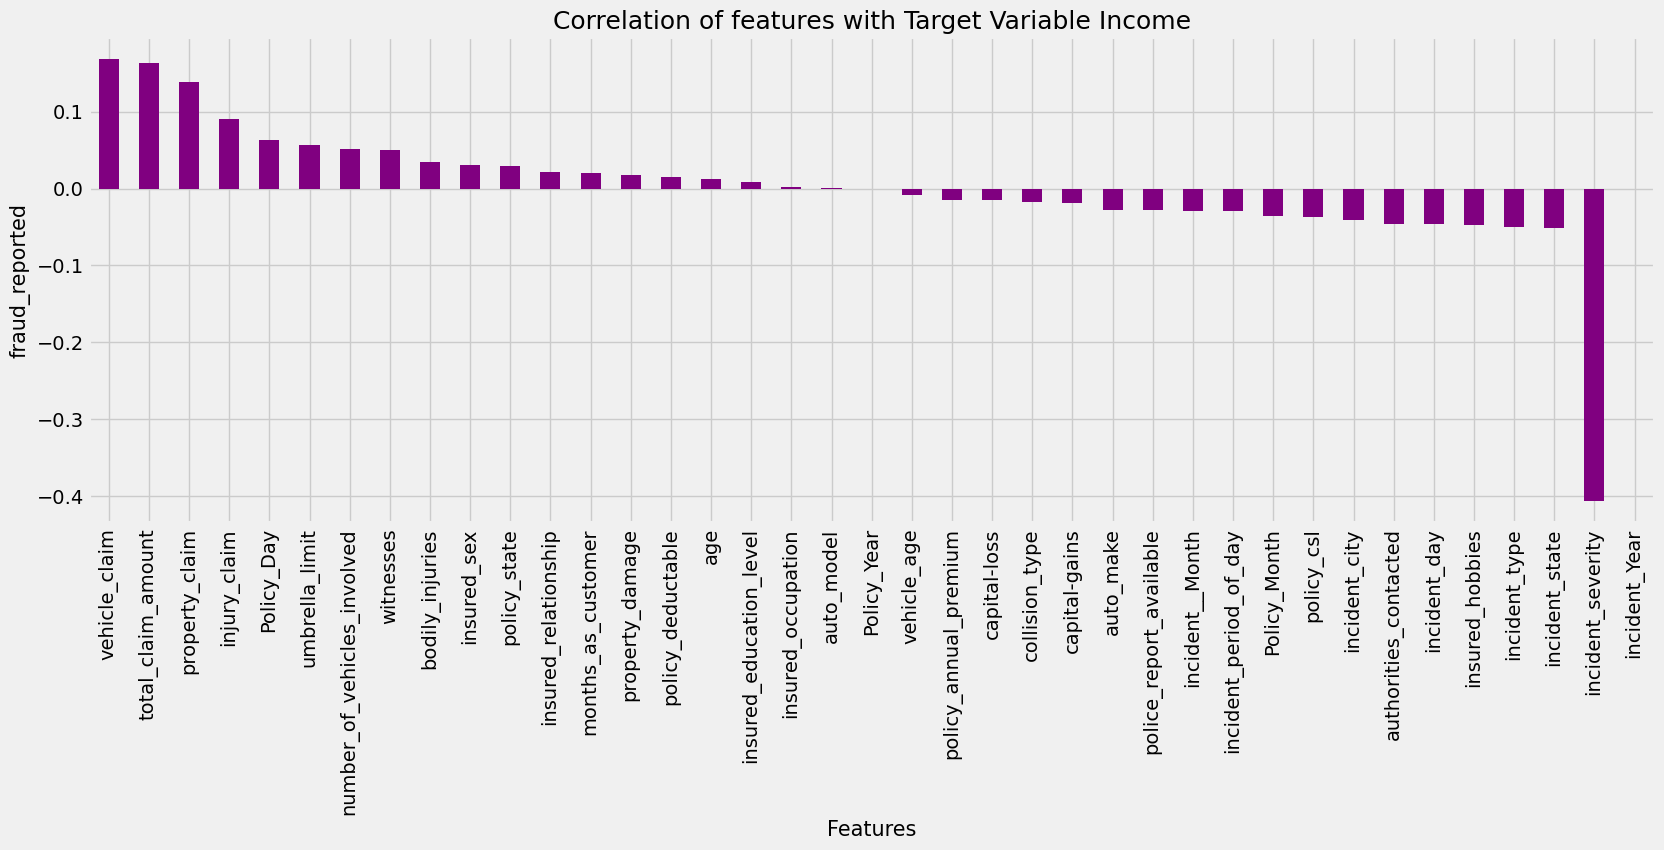

In [1215]:
plt.figure(figsize = (18,6))
df.corr()['fraud_reported'].drop(['fraud_reported']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('fraud_reported',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

In [ ]:
#vehicle_claim,Total_claim_amount,injury_claim,policy_day are highly positively corelated to target variable
#incident_severity	is highly negatively correlated to target variable


In [1216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.900233,months_as_customer
1,6.871565,age
2,1.035852,policy_state
3,1.033308,policy_csl
4,1.039323,policy_deductable
5,1.039810,policy_annual_premium
6,1.043353,umbrella_limit
7,1.029252,insured_sex
8,1.046604,insured_education_level
9,1.018492,insured_occupation


In [1217]:
#Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.

In [1218]:
#Balancing using SMOTE
# Splitting data in target and dependent feature
x = df.drop('fraud_reported', axis =1)
y = df['fraud_reported']

In [1220]:
# Oversampleing using SMOTE Techniques
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x1,y1 = oversample.fit_resample(x, y)

In [1221]:
y1.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [1222]:
#We have successfully resolved the class imbalanced problem

In [1223]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,Policy_Day,Policy_Month,Policy_Year,incident_day,incident__Month,incident_Year,vehicle_age,incident_period_of_day
0,1.078140,0.990836,1.187173,0.060937,-0.222383,0.616705,-0.349113,1.076953,0.530931,-1.158316,...,0.856466,-1.645743,0.176292,0.983684,1.684992,1.154424,-0.947587,0.0,0.183440,-0.833162
1,0.208995,0.334073,-0.016856,0.060937,1.412784,-0.242521,1.357817,1.076953,0.530931,-0.162558,...,0.360539,-0.657470,1.312191,-0.159802,0.597550,0.692885,-0.947587,0.0,-0.315491,0.538674
2,-0.608002,-1.088913,1.187173,-1.182668,1.412784,0.642233,1.357817,-0.928546,1.557877,1.082141,...,-0.631315,0.959702,-1.073198,0.697813,-0.218032,0.808270,0.962871,0.0,-0.315491,0.538674
3,0.452355,0.224613,-1.220886,0.060937,1.412784,0.652886,1.644005,-0.928546,1.557877,-1.407256,...,-0.879279,1.319074,1.085011,-0.445674,-1.577335,-0.576347,-0.947587,0.0,-1.479664,-0.833162
4,0.208995,0.552994,-1.220886,1.304542,-0.222383,1.341980,1.644005,1.076953,-1.522961,1.082141,...,-1.623169,1.049545,-1.073198,-0.159802,1.684992,0.231346,0.962871,0.0,-0.648112,-0.375883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.187173,1.304542,-0.222383,0.222884,-0.349113,-0.928546,1.044404,-1.158316,...,-0.135388,-1.196528,0.062702,0.126069,-1.441405,0.808270,0.962871,0.0,-0.149180,-0.375883
996,0.704407,0.224613,-1.220886,-1.182668,-0.222383,0.739141,-0.349113,-0.928546,1.557877,0.584261,...,1.600357,0.780016,-1.186788,-1.589160,1.684992,1.039039,-0.947587,0.0,-1.645974,0.995953
997,-0.642767,-0.541611,1.187173,0.060937,-1.039966,0.520739,0.756509,-0.928546,1.044404,-1.407256,...,1.104430,-0.028570,0.176292,-1.303289,0.189759,0.923655,-0.947587,0.0,1.513924,-0.833162
998,2.208028,2.523284,-1.220886,1.304542,1.412784,0.411866,1.357817,1.076953,-1.522961,-0.411497,...,-1.375206,-1.286371,0.289882,1.269556,1.277201,1.269809,0.962871,0.0,1.181303,1.453231


# Machine Learning Model Building

In [1224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [1225]:
#finding best random state 

In [1226]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    ls=LogisticRegression()
    ls.fit(x_train,y_train)
    pred=ls.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i;
print("Best accuracy score is ",maxaccu,"at random_state ",maxrs)

Best accuracy score is  0.6172566371681416 at random_state  21


In [1227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [1228]:
#RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7566666666666667
[[205   7]
 [ 66  22]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       212
           1       0.76      0.25      0.38        88

    accuracy                           0.76       300
   macro avg       0.76      0.61      0.61       300
weighted avg       0.76      0.76      0.71       300



In [1229]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7
[[191  21]
 [ 69  19]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       212
           1       0.47      0.22      0.30        88

    accuracy                           0.70       300
   macro avg       0.60      0.56      0.55       300
weighted avg       0.66      0.70      0.66       300



In [1230]:
#SUPPORT VECTOR MACHINE CLASSIFIER
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7066666666666667
[[212   0]
 [ 88   0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       212
           1       0.00      0.00      0.00        88

    accuracy                           0.71       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.50      0.71      0.59       300



In [1231]:
#GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)

print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.81
[[188  24]
 [ 33  55]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       212
           1       0.70      0.62      0.66        88

    accuracy                           0.81       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.81      0.81      0.81       300



In [1232]:
#ADA BOOST CLASSIFIER
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)

print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7766666666666666
[[194  18]
 [ 49  39]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       212
           1       0.68      0.44      0.54        88

    accuracy                           0.78       300
   macro avg       0.74      0.68      0.70       300
weighted avg       0.76      0.78      0.76       300



In [1233]:
#BAGGING CLASSIFIER
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)

print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8066666666666666
[[189  23]
 [ 35  53]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       212
           1       0.70      0.60      0.65        88

    accuracy                           0.81       300
   macro avg       0.77      0.75      0.76       300
weighted avg       0.80      0.81      0.80       300



In [1234]:
#EXTRA TREE CLASSIFIER
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)

print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.73
[[209   3]
 [ 78  10]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       212
           1       0.77      0.11      0.20        88

    accuracy                           0.73       300
   macro avg       0.75      0.55      0.52       300
weighted avg       0.74      0.73      0.65       300



In [1235]:
#we can say GradientBoostingClassifier() is the best model with accuracy score is 0.81. so for better prediction we have to cross validation

In [1236]:
#CROSS VALIDATIO SCORE
#Cross Validation for performance of data afer modeling 
# Cross validation for RandomForestClassifier
from sklearn.model_selection import cross_val_score
score1=cross_val_score(RFC,x1,y1)
print(score1)
print(score1.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predRFC)-score1.mean())

[0.67549669 0.80066445 0.93355482 0.94352159 0.93355482]
0.857358473960969
Difference between accuracy Score and Cross validation score is -  -0.10069180729430227


In [1237]:
##Checking cv score for Logistic Regression
score2=cross_val_score(LR,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predLR)-score2.mean())

[0.59271523 0.49501661 0.56146179 0.59800664 0.56810631]
0.563061318782865
Difference between accuracy Score and Cross validation score is -  0.13693868121713493


In [1238]:
#Checking cv score for GradientBoostClssifier
score3=cross_val_score(GB,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predGB)-score3.mean())

[0.7218543  0.81727575 0.92026578 0.94352159 0.91694352]
0.8639721898308068
Difference between accuracy Score and Cross validation score is -  -0.05397218983080676


In [1239]:
#Checking cv score for Support vector Machine Classifier
score4=cross_val_score(svc,x1,y1)
print(score4)
print(score4.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predsvc)-score4.mean())

[0.60264901 0.52159468 0.56478405 0.55813953 0.58471761]
0.5663769774042375
Difference between accuracy Score and Cross validation score is -  0.14028968926242913


In [1240]:
#Checking cv score for Support vector Bagging Classifier
score5=cross_val_score(BC,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predBC)-score5.mean())

[0.77152318 0.81727575 0.90365449 0.92026578 0.88704319]
0.8599524762931509
Difference between accuracy Score and Cross validation score is -  -0.053285809626484215


In [1241]:
#Checking cv score for Support vector Extra Trees Classifier
score6=cross_val_score(ET,x1,y1)
print(score6)
print(score6.mean())
print("Difference between accuracy Score and Cross validation score is - ",accuracy_score(y_test,predET)-score6.mean())

[0.83774834 0.86378738 0.93687708 0.94684385 0.95016611]
0.9070845525951026
Difference between accuracy Score and Cross validation score is -  -0.17708455259510258


In [1243]:
#we conclude after the cross validation score and accuracy score the GradientBoostClssifier is the best model.

In [1247]:
# hyper parameter turning
from sklearn.model_selection import GridSearchCV
parameters={'loss':['log_loss','exponential'],
           'learning_rate':[1.2,2.0,5.0],
           'n_estimators':[1,20,50,100],
            'criterion':['friedman_mse','squared_error'],
            'random_state':[1,2,5]
            }
gscv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
gscv.fit(x_train,y_train)
            

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [1.2, 2.0, 5.0],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [1, 20, 50, 100],
                         'random_state': [1, 2, 5]})

In [1248]:
gscv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 1.2,
 'loss': 'log_loss',
 'n_estimators': 1,
 'random_state': 2}

In [1252]:
#check modell again with parameters to get best performance
f_model=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.2,loss='log_loss',n_estimators=1,random_state=2)
f_model.fit(x_train,y_train)
pred=f_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.33333333333334


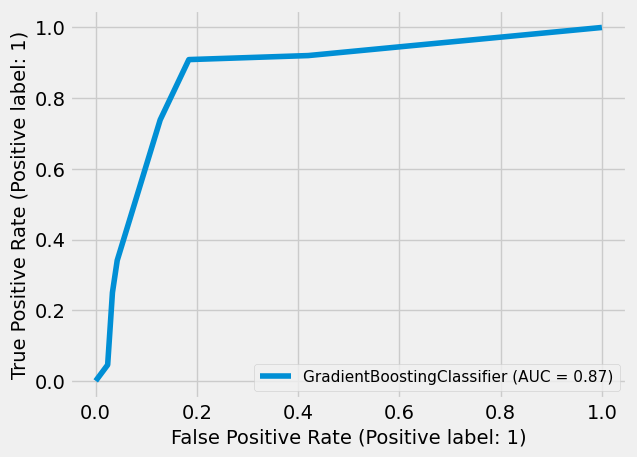

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.8333333333333334


In [1253]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(f_model,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
print('\033[1m'+'Auc Score :'+'\033[0m\n',acc)

In [1254]:
#we can conclude the GradientBoostingClassifier is the best model with good accuracy 0.8333333333333334

In [1255]:
# Saving the model
import joblib
joblib.dump(f_model,"Insurance_claim_fraud_project.pkl")

['Insurance_claim_fraud_project.pkl']

In [1256]:
#predicting the saved model
model=joblib.load("Insurance_claim_fraud_project.pkl")
a=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
a

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
predicted,1,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
original,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
